In [2]:
import helpFunctions as hf 
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import math
import sympy 
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
import scipy
# import pylaimport math
from numpy import exp, arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show



In [ ]:
# Exercise 1.2
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/Salami/data/'

mu_men = 175.5
mu_women = 162.9

def f(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*sympy.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

x = []
i = 140
while i <= 210:
    x.append(i)
    i+=0.5


heights_men = [f(i, mu_men) for i in x]
heights_women = [f(i, mu_women) for i in x]

plt.plot(x, heights_men, color="b")
plt.plot(x, heights_women, color="r")
plt.title("Height distribution")
plt.grid()
plt.show()

We are now interested in finding the value of x where:
f(x|175.5) ≥ f(x|162.9)
Find the solution graphical and by evaluation of the inequality.

In this inequality is x is the height at which it is more probable to to be male than female. Graphically, we can approximate this height to around 169 cm.

In [ ]:
# Exercise 1.3
from scipy.optimize import minimize_scalar
print(f(170,mu_men)/f(170,mu_women))

# def func(x):
#     return f(x,mu_men)/f(x,mu_women) - 1

def func(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*np.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

# res = minimize_scalar(func)
# print(res.x)
# print(res.fun)

# x = Symbol('x')
# print(sympy.nonlinsolve([f(x,mu_men)-f(x,mu_women)], [x]))



In [ ]:
def approx_intersect(min_initial, max_initial, num_vals, interval):
    x_vals = np.linspace(min_initial, max_initial, num_vals)
    for i in x_vals:
        if f(i, mu_men)/f(i, mu_women) <= 1+interval and  f(i, mu_men)/f(i, mu_women) >= 1-interval: return i
    return None

print(approx_intersect(168, 171, 6000, 0.0005))

In [ ]:
#scipy.optimize.fsolve(lambda r: f(r,mu_men)-f(r,mu_women), 165)

def solveInter(func1,func2,incr,approx):
    i = 0
    r = True
    x = approx
    result = 0
    while r:
        set1 = func1(x)
        set2 = func2(x)
        if (set1 - set2) <= 0:
            r = True
            i += 1
        else:
            r = False
            result = x
        x += incr
    return result

def func1(x):
    return f(x,mu_men)

def func2(x):
    return f(x,mu_women)

print(solveInter(func1,func2,0.001,mu_women))


In [ ]:
# Exercise 1.5

def z_func(x1, x2):
    return (1 / 2 * math.pi) * (1 / 2 * 3) * exp((-1 / 2) * (1 / 4 * x1 ** 2 + (1 / 9) * (x2 - 1) ** 2))


# def z_func(x,y):
# return (1-(x*2+y3))*exp(-(x2+y*2)/2)

x = arange(-5.0, 5.0, 0.1)
y = arange(-5.0, 5.0, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = z_func(X, Y)  # evaluation of the function on the grid

im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1, 1.5, 0.2), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$PDF=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
show()

In [ ]:
# # Exercise 1.6
# # plot joint pdf according to correlation coefficient
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# # from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show



# def correlation(x1,x2,rho):
#     poly = 1/4 * x1**2 - 2/6*rho*x1*(x2-1) + 1/9 * (x2 - 1)**2
#     return 1/(2*math.pi) * 1/6 * 1/(math.sqrt(1-rho**2)) * exp(-1/2 * 1/(1-rho**2) * (poly) )

# x = arange(-10, 10, 0.1)
# y = arange(-10, 10, 0.1)
# X, Y = meshgrid(x, y)  # grid of point
# Z = correlation(X, Y,2/3)  # evaluation of the function on the grid

# #print(X,Y,Z)
# #exit()
# im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# # adding the Contour lines with labels
# cset = contour(Z, arange(0, 1, 0.00001), linewidths=2, cmap=cm.Set2)
# clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
# colorbar(im)  # adding the colobar on the right
# # latex fashion title
# title('$z=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
# show()

In [ ]:
#plotting spectral bands

dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'
multiIm, annotationIm = hf.loadMulti('multispectral_day20.mat' , 'annotation_day20.png', dirIn)

print(multiIm.shape)
print(annotationIm.shape)

print(multiIm[:,:,6])

def showSpectral(band):
    plt.imshow(multiIm[:,:,band-1])
    plt.title("spectral band {}".format(band))
    plt.show()

showSpectral(10)


In [ ]:
# Show annotations
## In each layer we have a binary image:
# 0 - background with salami
# 1 fat annotation
# 2 meat annotation

def showAnnotations(annotationIm,layer):
    plt.imshow(annotationIm[:,:,layer])
    title = "meat annotation"
    if(layer == 0): title = "background"
    if(layer == 1): title = "fat annotation"
    plt.title(title)
    plt.show()

showAnnotations(annotationIm,1)



In [ ]:
# Compute threshold t for all spectral bands on day 1
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'
multiIm, annotationIm = hf.loadMulti('multispectral_day01.mat' , 'annotation_day01.png', dirIn)


multiIm.shape

# showSpectral(1)
# print(multiIm[:,:,0])



In [ ]:
# compute for one pixel
a,b = 250,250

# spectral band 1
band = 0
sp = multiIm[:,:,band]
print("spectral band 1 = " ,sp)

# compute mean
mu = np.mean(sp)
print("mu = " ,mu)

#compute standard deviation

std = np.std(sp)
print("std = ", std)

x = multiIm[a,b,0]
print("x = ", x)

# simple threshold:

if x >= mu:
    print("x >= t -> x in class C1")
else:
    print("x < t -> x in class C2")

In [ ]:
# Generalise 
# array of multiple means - means for each spectral band
mumu = []
for i in range(len(multiIm[0,0,:])):
    mumu.append(np.mean(multiIm[:,:,i]))
# print(mumu)
print("dimensions of multiple means array = ",len(mumu))
# print(mumu.shape)

#xa : is the pixel value in dimension a
#xb : is the pixel value in dimension b

# covariance assuming equal for both classes
# number of spectral bands
n = len(mumu)
# number of pixels per spectral band
m = len(multiIm[:,0,0])
print("m = ",m)
cov = np.zeros(shape=(n,n))

for a in range(n):
    for b in range(n):
        cov[a][b] = 1/(m**2 - 1) * sum((multiIm[:,:,a].flatten()-mumu[a])*(multiIm[:,:,b].flatten()-mumu[b]))


print("first four columns of the covariance matrix : ")
print(cov[0:4,0:4])
print(cov.shape)

In [ ]:
# considering difference in classes

# extract meat pixels
ann = 2
[clPix, r, c] = hf.getPix(multiIm,annotationIm[:,:,ann])

print(len(clPix[:,0]))

a,b = r[5],c[5]

if a in r and b in c:
    print(f"cell {a},{b} is a meat cell")
else:
    print(f"cell {a},{b} is not a meat cell")


# mean vectors
mu_meat = []
n_meat = len(clPix[0])
m_meat = len(clPix[:,0])
for i in range(n):
    mu_meat.append(np.mean(clPix[:,i]))

print("mu_meat = ", mu_meat)
print(len(mu_meat))


In [ ]:
# consider fat cells
ann = 1
[clPix, r, c] = hf.getPix(multiIm,annotationIm[:,:,ann])

print(len(clPix[:,0]))
x = multiIm[a,b,:]

if a in r and b in c:
    print(f"cell {a},{b} is a fat cell")
else:
    print(f"cell {a},{b} is not a fat cell")

c,d = r[5],c[5]
y = multiIm[c,d,:]

# mean vectors
mu_fat = []
n_fat = len(clPix[0])
m_fat = len(clPix[:,0])
for i in range(n):
    mu_fat.append(np.mean(clPix[:,i]))

print("mu_fat = ", mu_fat)
print(len(mu_fat))

In [ ]:
# Decision using simple threshold
# simple threshold - mean of meat and fat pixels
# do we have to compare the mean of x with the mean of all meat/ fats or just the value of 1 spectral band?
# print()
# x is a meat cell
if np.mean(x) >= np.mean(mu_meat):
    print("x >= t_meat -> x is meat")
if np.mean(x) >= np.mean(mu_fat):
    print("x >= t_fat -> x is fat")



In [ ]:
# Decision using simple threshold
# simple threshold - comparing differences to mean
mx = np.mean(x)
if abs(np.mean(mu_meat) - mx) < abs(np.mean(mu_fat) - mx):
    print("x is meat")
else:
    print("x is fat")


my = np.mean(y)
if abs(np.mean(mu_meat) - my) < abs(np.mean(mu_fat) - my):
    print("y is meat")
else:
    print("y is fat")


In [ ]:
# compute PDF for f_1 (fat annotation)

def f_fat(x):
    det = np.linalg.det(cov)
    fact = 1/(2*math.pi*math.sqrt(det))
    mat = np.dot(np.transpose(x-mu_fat),np.linalg.inv(cov))
    mat = np.dot(mat,(x-mu_fat))

    return fact*math.exp(-1/2 * mat)


x = multiIm[a,b,:]


print(f_fat(x))



In [ ]:
# compute PDF for f_2 (meat annotation)



def f_meat(x):
    det = np.linalg.det(cov)
    fact = 1/(2*math.pi*math.sqrt(det))
    mat = np.dot(np.transpose(x-mu_meat),np.linalg.inv(cov))
    mat = np.dot(mat,(x-mu_meat))

    return fact*math.exp(-1/2 * mat)



x = multiIm[a,b,:]

print(f_meat(x))

In [ ]:
# Decision using normal distribution 
# expected: x is meat
if f_meat(x) > f_fat(x):
    print("x is meat")
else:
    print("x is fat")

# Threshold value for a single spectral band
Using the mean values for meat and fat in a single spectral band, we can construct a threshold value. 
This can be done by simple comparison to the means, difference to the mean or by modelling through a simple 1D normal distribution.
For two normal distributions with the same standard deviation but different means, the threshold value can be computed as:
$$
\frac{f(x|\mu_1)}{f(x|\mu_2)}
$$

The standard deviation is computed over all values.

In [ ]:
# Gaussian distribution
def Gauss(x,mu,s):
    return 1/(s*math.sqrt(2*math.pi)) * np.exp(-1/2 * 1/s**2 * (x-mu)**2)

In [ ]:
# for spectral band 1
# compute std
band = 0

# fat test pixel



s = np.std(multiIm[:,:,band])
mu_1 = mu_meat[band]
mu_2 = mu_fat[band] 

def func1(x):
    return Gauss(x,mu_1,s)

def func2(x):
    return Gauss(x,mu_2,s)

t = solveInter(func1,func2,0.001,mu_1)

if(mu_1 < mu_2):
    print("mu_1 < mu_2")
else:
    print("mu_1 >= mu_2")

print(f"Threshold value t = {t}")


In [ ]:
bands = len(multiIm[0,0,:])

thresholds = []

for band in range(bands):
    s = np.std(multiIm[:,:,band])
    mu_1 = mu_meat[band]
    mu_2 = mu_fat[band] 

    def func1(x):
        return Gauss(x,mu_1,s)

    def func2(x):
        return Gauss(x,mu_2,s)

    thresholds.append(solveInter(func1,func2,0.001,mu_1))

print(f"t = {thresholds}")



In [ ]:
# check test pixel
def checkSimple(x,t):
    if x < t:
        # meat
        return 0
    else:
        # fat
        return 1


In [ ]:
def checkSimplePrint(x,t):
    if x < t:
        print("x is meat")
    else:
        print("x is fat")


## Computing the error rate for the simple approximation of each error space
We compute how many pixels that were annotated as meat pixels are classified as meat by the simple classification model, similarly for fat pixels

In [ ]:
# computing error 

# fat pixels
ann = 1
[clPixFat, rFat, cFat] = hf.getPix(multiIm,annotationIm[:,:,ann])

# meat pixels
ann = 2
[clPixMeat, rMeat, cMeat] = hf.getPix(multiIm,annotationIm[:,:,ann])


fatPixels = len(rFat)
meatPixels = len(rMeat)

# count classified pixels
bandErrorFat = []
bandErrorMeat = []

# threshold value (computed previously)
print(f"Threshold values t = {thresholds}")

# the function checkSimple returns 0 for meat and 1 for fat


for band in range(len(clPixMeat[0])):
    t = thresholds[band]
    fatsClassification = 0
    for i in range(fatPixels):
        f = multiIm[rFat[i],cFat[i],band]
        fatsClassification += checkSimple(f,t)


    meatClassification = 0
    for i in range(meatPixels):
        m = multiIm[rMeat[i],cMeat[i],band]
        meatClassification += abs(1-checkSimple(m,t))

    # print(f"Band {band} : {fatsClassification} out of {fatPixels} fat pixels correctly - error rate: {1-fatsClassification/fatPixels}")
    # print(f"Band {band} : {meatClassification} out of {meatPixels} meat pixels correctly - error rate: {1-meatClassification/meatPixels}")

    bandErrorFat.append(1-fatsClassification/fatPixels)
    bandErrorMeat.append(1-meatClassification/meatPixels)


# print(f"Percent correctly classified fat = {fatsClassification/fatPixels * 100}%")
# print(f"Percent correctly classified meat = {meatClassification/meatPixels * 100}%")


print(f"Mean meat error rate = {np.mean(bandErrorMeat)}")
print(f"Mean fat error rate = {np.mean(bandErrorFat)}")



len(clPixFat[:,0])

In [ ]:
# determine the spectral band with the best discriminative properties for meat and fat
dist = np.sqrt(np.array(bandErrorMeat)**2 + np.array(bandErrorFat)**2)
ind = np.where(dist == min(dist))[0][0]

ind



In [ ]:
# classify image for salami on day 1 - band 2
image = multiIm[:,:,ind]

background = annotationIm[:,:,0]
fatLayer = np.zeros(image.shape)
meatLayer = np.zeros(image.shape)

x,y = image.shape

t = thresholds[ind]

colours = [[[] for i in range(x)] for j in range(y)]
blue = [0, 0, 255] 
green = [0, 255, 0]
red = [255, 0, 0]



for i in range(x):
    for j in range(y):
        fatLayer[i][j] = checkSimple(multiIm[i,j,ind],t)
        meatLayer[i][j] = abs(1-checkSimple(multiIm[i,j,ind],t))
        if(not background[i][j]):
            colours[i][j] = blue
        elif(checkSimple(multiIm[i,j,ind],t)):
            # fat
            colours[i][j] = green
        else:
            # meat
            colours[i][j] = red



annoIm = np.array([background,fatLayer,meatLayer]).transpose()

# plt.imshow(annoIm[:,:,0])
# plt.title("Background")
# plt.show()

# plt.imshow(annoIm[:,:,1])
# plt.title("fat annotation")
# plt.show()

# plt.imshow(annoIm[:,:,2])
# plt.title("Meat annotation")
# plt.show()



plt.imshow(colours)
plt.title("Colour annotation")
plt.show()




## Computing the error rate for the Gaussian Model
Compute ratio of correctly classified pixels by the Gaussian Model

In [ ]:
# count classified pixels
bandErrorFat = []
bandErrorMeat = []

# threshold value (computed previously)
print(f"Threshold values t = {thresholds}")

# the function checkSimple returns 0 for meat and 1 for fat


for band in range(len(clPixMeat[0])):
    t = thresholds[band]
    fatsClassification = 0
    for i in range(fatPixels):
        f = multiIm[rFat[i],cFat[i],:]
        fatsClassification += (f_fat(f) > f_meat(f))


    meatClassification = 0
    for i in range(meatPixels):
        m = multiIm[rMeat[i],cMeat[i],:]
        meatClassification += (f_meat(m) > f_fat(m))

    # print(f"Band {band} : {fatsClassification} out of {fatPixels} fat pixels correctly - error rate: {1-fatsClassification/fatPixels}")
    # print(f"Band {band} : {meatClassification} out of {meatPixels} meat pixels correctly - error rate: {1-meatClassification/meatPixels}")

    bandErrorFat.append(1-fatsClassification/fatPixels)
    bandErrorMeat.append(1-meatClassification/meatPixels)


# print(f"Percent correctly classified fat = {fatsClassification/fatPixels * 100}%")
# print(f"Percent correctly classified meat = {meatClassification/meatPixels * 100}%")

print(f"Mean meat error rate = {np.mean(bandErrorMeat)}")
print(f"Mean fat error rate = {np.mean(bandErrorFat)}")


In [ ]:
# classify image for day 1 using discriminant
# classify image for salami on day 1 - band 2
image = multiIm[:,:,ind]

background = annotationIm[:,:,0]
fatLayer = np.zeros(image.shape)
meatLayer = np.zeros(image.shape)

x,y = image.shape

# t = thresholds[ind]

colours = [[[] for i in range(x)] for j in range(y)]
blue = [0, 0, 255] 
green = [0, 255, 0]
red = [255, 0, 0]



for i in range(x):
    for j in range(y):
        fatLayer[i][j] = (f_fat(multiIm[i,j,:]) > f_meat(multiIm[i,j,:]))
        meatLayer[i][j] = (f_meat(multiIm[i,j,:]) > f_fat(multiIm[i,j,:]))
        if(not background[i][j]):
            colours[i][j] = blue
        elif(checkSimple(multiIm[i,j,ind],t)):
            # fat
            colours[i][j] = green
        else:
            # meat
            colours[i][j] = red



annoIm = np.array([background,fatLayer,meatLayer]).transpose()

# plt.imshow(annoIm[:,:,0])
# plt.title("Background")
# plt.show()

# plt.imshow(annoIm[:,:,1])
# plt.title("fat annotation")
# plt.show()

# plt.imshow(annoIm[:,:,2])
# plt.title("Meat annotation")
# plt.show()



plt.imshow(colours)
plt.title("Colour annotation")
plt.show()




## Testing the models on images from different days
Both models were trained with data from day 1. We have determined that the ideal spectral band to classify meat and fat pixels is band 2. Even though the error rates in both models are not ideal, especially with regards to meat classification.


In [ ]:
# function to compute error rates for the simple threshold 
def errorSimple(multiIm,annotationIm,thresholds):
    # computing error 
    # fat pixels
    ann = 1
    [clPixFat, rFat, cFat] = hf.getPix(multiIm,annotationIm[:,:,ann])
    # meat pixels
    ann = 2
    [clPixMeat, rMeat, cMeat] = hf.getPix(multiIm,annotationIm[:,:,ann])

    fatPixels = len(rFat)
    meatPixels = len(rMeat)

    # count classified pixels
    bandErrorFat = []
    bandErrorMeat = []

    # the function checkSimple returns 0 for meat and 1 for fat
    for band in range(len(clPixMeat[0])):
        t = thresholds[band]
        fatsClassification = 0
        for i in range(fatPixels):
            f = multiIm[rFat[i],cFat[i],band]
            fatsClassification += checkSimple(f,t)
        meatClassification = 0
        for i in range(meatPixels):
            m = multiIm[rMeat[i],cMeat[i],band]
            meatClassification += abs(1-checkSimple(m,t))
        bandErrorFat.append(1-fatsClassification/fatPixels)
        bandErrorMeat.append(1-meatClassification/meatPixels)

    return bandErrorFat,bandErrorMeat


In [ ]:
# function to compute error rates for discriminant model
def errorDisc(multiIm,annotationIm):
    # fat pixels
    ann = 1
    [clPixFat, rFat, cFat] = hf.getPix(multiIm,annotationIm[:,:,ann])
    
    # meat pixels
    ann = 2
    [clPixMeat, rMeat, cMeat] = hf.getPix(multiIm,annotationIm[:,:,ann])
    # count classified pixels
    bandErrorFat = []
    bandErrorMeat = []

    fatPixels = len(rFat)
    meatPixels = len(rMeat)

    # bands = [ind]
    bands = range(len(clPixMeat[0]))

    for band in bands:
        t = thresholds[band]
        fatsClassification = 0
        for i in range(fatPixels):
            f = multiIm[rFat[i],cFat[i],band]
            fatsClassification += (f_fat(f) > f_meat(f))


        meatClassification = 0
        for i in range(meatPixels):
            m = multiIm[rMeat[i],cMeat[i],band]
            meatClassification += (f_meat(m) > f_fat(m))

        # print(f"Band {band} : {fatsClassification} out of {fatPixels} fat pixels correctly - error rate: {1-fatsClassification/fatPixels}")
        # print(f"Band {band} : {meatClassification} out of {meatPixels} meat pixels correctly - error rate: {1-meatClassification/meatPixels}")

        bandErrorFat.append(1-fatsClassification/fatPixels)
        bandErrorMeat.append(1-meatClassification/meatPixels)

        
    return bandErrorFat,bandErrorMeat

In [ ]:
# test error rates for day 6

multiIm06, annotationIm06 = hf.loadMulti('multispectral_day06.mat' , 'annotation_day06.png', dirIn)
thresholds

fatError06,meatError06 = errorSimple(multiIm06,annotationIm06,thresholds)

print(np.mean(fatError06))
print(np.mean(meatError06))

In [ ]:
# test error rates for day 13

multiIm13, annotationIm13 = hf.loadMulti('multispectral_day13.mat' , 'annotation_day13.png', dirIn)
thresholds

fatError13,meatError13 = errorSimple(multiIm13,annotationIm13,thresholds)

print(np.mean(fatError13))
print(np.mean(meatError13))

In [ ]:
# test error rates for day 20

multiIm20, annotationIm20 = hf.loadMulti('multispectral_day20.mat' , 'annotation_day20.png', dirIn)
thresholds

fatError20,meatError20 = errorSimple(multiIm20,annotationIm20,thresholds)

print(np.mean(fatError20))
print(np.mean(meatError20))

In [ ]:
# test error rates for day 28

multiIm28, annotationIm28 = hf.loadMulti('multispectral_day28.mat' , 'annotation_day28.png', dirIn)
thresholds

fatError28,meatError28 = errorSimple(multiIm28,annotationIm28,thresholds)

print(np.mean(fatError28))
print(np.mean(meatError28))

# Classifcation using information from all spectral bands
 

In [ ]:
# day 6
ind
fatError06_2,meatError06_2 = errorDisc(multiIm06,annotationIm06)

print(np.mean(fatError06_2))
print(np.mean(meatError06_2))

print(fatError06_2)
print(meatError06_2)

In [ ]:
# day 13
# multiIm13.shape
fatError13_2,meatError13_2 = errorDisc(multiIm13,annotationIm13)

print(np.mean(fatError13_2))
print(np.mean(meatError13_2))

In [ ]:
# day 20
fatError20_2,meatError20_2 = errorDisc(multiIm20,annotationIm20)

print(np.mean(fatError20_2))
print(np.mean(meatError20_2))

In [ ]:
# day 28
fatError28_2,meatError28_2 = errorDisc(multiIm28,annotationIm28)

print(np.mean(fatError28_2))
print(np.mean(meatError28_2))

# Training the model on different days
So far the model has been trained on data from day 1. This is probably not the best approach, as the salami dries out and meat and fat pixel present differently throughout the month.


In [1]:
# perform computations above on day 1 using new helper functions
import functions as func
import helpFunctions as hf

dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'

day = "06"

multiIm, annotationIm = hf.loadMulti(f'multispectral_day{day}.mat' , f'annotation_day{day}.png', dirIn)



In [ ]:
# compute means
mu_fat,mu_meat = func.means(multiIm,annotationIm)

In [ ]:
# compute parameters
params = func.params(multiIm)

In [ ]:
# define meat and fat functions
def f_fat(x):
    return func.f(x,mu_fat,params)

def f_meat(x):
    return func.f(x,mu_meat,params)

In [ ]:
# compute thresholds
thresholds = func.thresholds(multiIm,mu_meat,mu_fat)

In [ ]:
# compute error rates for the simple model
bandErrorFat,bandErrorMeat = func.errorSimple(multiIm,annotationIm,thresholds)
bandErrorFat,bandErrorMeat

np.mean(bandErrorMeat)



In [ ]:
# show image
func.showClassificationSimple(multiIm,annotationIm,bandErrorFat,bandErrorMeat,thresholds)

In [4]:
# compute ideal error rates for all days

days = ['01','06','13','20','28']
training = '06'

errorMatrix = np.zeros(shape = (len(days),len(days)-1))

for i in range(len(days)):
    errorRates = func.errorRates(days[i],dirIn)
    errorMatrix[i] = errorRates

errorMatrix

['06', '13', '20', '28']
best spectral band is 2
06 0.1160220994475138
best spectral band is 0
13 0.25970149253731345
best spectral band is 18
20 0.353792088917947
best spectral band is 14
28 0.3190224570673712
['01', '13', '20', '28']
best spectral band is 10
01 0.12037037037037035
best spectral band is 10
13 0.3171641791044776
best spectral band is 18
20 0.353792088917947
best spectral band is 14
28 0.2939233817701453
['01', '06', '20', '28']
best spectral band is 12
01 0.003968253968253954
best spectral band is 17
06 0.039779005524861855
best spectral band is 14
20 0.2496675550334938
best spectral band is 17
28 0.07203389404845023
['01', '06', '13', '28']
best spectral band is 9
01 0.0018387471947843848
best spectral band is 7
06 0.011602209944751363
best spectral band is 9
13 0.10747768694217352
best spectral band is 17
28 0.062304674746723854
['01', '06', '13', '20']
best spectral band is 11
01 0.002645502645502673
best spectral band is 7
06 0.018232044198895014
best spectral band

array([[0.116, 0.26 , 0.354, 0.319],
       [0.12 , 0.317, 0.354, 0.294],
       [0.004, 0.04 , 0.25 , 0.072],
       [0.002, 0.012, 0.107, 0.062],
       [0.003, 0.018, 0.122, 0.226]])

In [5]:
errorMatrix

array([[0.116, 0.26 , 0.354, 0.319],
       [0.12 , 0.317, 0.354, 0.294],
       [0.004, 0.04 , 0.25 , 0.072],
       [0.002, 0.012, 0.107, 0.062],
       [0.003, 0.018, 0.122, 0.226]])

In [6]:
import pandas as pd


In [33]:
pdErrorMatrix = pd.DataFrame(errorMatrix)
for i in range(len(days)):
    days[i] = "Day "+days[i]
pdErrorMatrix.index = days
means = round(pdErrorMatrix.mean(axis=1),2)
pdErrorMatrix['means'] = means
pdErrorMatrix



,0,1,2,3,means
Day 01,0.116,0.260,0.354,0.319,0.26
Day 06,0.120,0.317,0.354,0.294,0.27
Day 13,0.004,0.040,0.250,0.072,0.09
Day 20,0.002,0.012,0.107,0.062,0.05
Day 28,0.003,0.018,0.122,0.226,0.09


In [34]:
pdErrorMatrix.to_csv("errorRatesSimpleModel.csv")


# Training on different days -  model 2
Now we will adjust the previous calculations according to the linear discriminant function
$$
S_i(x) = x^T \Sigma^{-1} \mu_i - \frac{1}{2} \mu_i^T \Sigma \mu_i + \log{p_i}
$$

In [24]:
import functions as func
import helpFunctions as hf
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'


In [ ]:
params = func.params(multiIm)

In [ ]:
# compute error rates for the simple model
p = 1
bandErrorFat,bandErrorMeat = func.errorLinDisc(multiIm,annotationIm,params,p)
bandErrorFat,bandErrorMeat

In [15]:
# compute ideal error rates for all days

days = ['01','06','13','20','28']
training = '06'
p = None


errorMatrixLinDisc = np.zeros(shape = (len(days),len(days)-1))

for i in range(len(days)):
    errorRates = func.errorRatesLinDisc(days[i],dirIn,p)
    print(days[i], errorRates)
    errorMatrixLinDisc[i] = errorRates



['06', '13', '20', '28']
06 0.007734806629834279
13 0.05597014925373134
20 0.02542372881355931
28 0.0819022457067371
01 [0.008, 0.056, 0.025, 0.082]
['01', '13', '20', '28']
01 0.009259259259259245
13 0.06119402985074629
20 0.020581113801452777
28 0.07926023778071334
06 [0.009, 0.061, 0.021, 0.079]
['01', '06', '20', '28']
01 0.010582010582010581
06 0.0027624309392265123
20 0.012711864406779683
28 0.04227212681638043
13 [0.011, 0.003, 0.013, 0.042]
['01', '06', '13', '28']
01 0.011243386243386222
06 0.0027624309392265123
13 0.010447761194029848
28 0.03830911492734479
20 [0.011, 0.003, 0.01, 0.038]
['01', '06', '13', '20']
01 0.013227513227513255
06 0.007182320441988965
13 0.023880597014925398
20 0.011501210653753036
28 [0.013, 0.007, 0.024, 0.012]


In [16]:
errorMatrixLinDisc

array([[0.008, 0.056, 0.025, 0.082],
       [0.009, 0.061, 0.021, 0.079],
       [0.011, 0.003, 0.013, 0.042],
       [0.011, 0.003, 0.01 , 0.038],
       [0.013, 0.007, 0.024, 0.012]])

In [17]:
import pandas as pd

In [28]:
pdErrorMatrix = pd.DataFrame(errorMatrixLinDisc)
pdErrorMatrix.index = days
means = round(pdErrorMatrix.mean(axis=1),3)
pdErrorMatrix['means'] = means

pdErrorMatrix

# pdErrorMatrix.mean(axis=1)


,0,1,2,3,means
01,0.008,0.056,0.025,0.082,0.043
06,0.009,0.061,0.021,0.079,0.042
13,0.011,0.003,0.013,0.042,0.017
20,0.011,0.003,0.010,0.038,0.016
28,0.013,0.007,0.024,0.012,0.014


In [29]:
pdErrorMatrix.to_csv("errorRatesLinDiscModel.csv")

In [19]:
pdErrorMatrix

,0,1,2,3
01,0.008,0.056,0.025,0.082
06,0.009,0.061,0.021,0.079
13,0.011,0.003,0.013,0.042
20,0.011,0.003,0.010,0.038
28,0.013,0.007,0.024,0.012


# Linear Discriminant Model with Prior Knowledge
We now assume that there is 30% of fat in the Salami

In [45]:
# compute ideal error rates for all days

days = ['01','06','13','20','28']
# training = '06'
p = 0.3

errorMatrixLinDiscP = np.zeros(shape = (len(days),len(days)-1))

for i in range(len(days)):
    errorRates = func.errorRatesLinDisc(days[i],dirIn,p)
    print(days[i], errorRates)
    errorMatrixLinDiscP[i] = errorRates

errorMatrixLinDiscP

['06', '13', '20', '28']
06 0.00883977900552485
13 0.06343283582089554
20 0.03389830508474578
28 0.08982826948480843
01 [0.009, 0.063, 0.034, 0.09]
['01', '13', '20', '28']
01 0.011904761904761918
13 0.07462686567164178
20 0.02723970944309928
28 0.08256274768824307
06 [0.012, 0.075, 0.027, 0.083]
['01', '06', '20', '28']
01 0.011904761904761918
06 0.0027624309392265123
20 0.013922518159806274
28 0.04623513870541612
13 [0.012, 0.003, 0.014, 0.046]
['01', '06', '13', '28']
01 0.011904761904761918
06 0.003314917127071826
13 0.012686567164179097
28 0.04887714663143988
20 [0.012, 0.003, 0.013, 0.049]
['01', '06', '13', '20']
01 0.013227513227513255
06 0.008287292817679537
13 0.029104477611940294
20 0.015133171912832921
28 [0.013, 0.008, 0.029, 0.015]


array([[0.009, 0.063, 0.034, 0.09 ],
       [0.012, 0.075, 0.027, 0.083],
       [0.012, 0.003, 0.014, 0.046],
       [0.012, 0.003, 0.013, 0.049],
       [0.013, 0.008, 0.029, 0.015]])

In [46]:
errorMatrixLinDisc - errorMatrixLinDiscP

array([[-0.001, -0.007, -0.009, -0.008],
       [-0.003, -0.014, -0.006, -0.004],
       [-0.001,  0.   , -0.001, -0.004],
       [-0.001,  0.   , -0.003, -0.011],
       [ 0.   , -0.001, -0.005, -0.003]])

In [47]:
pdErrorMatrix = pd.DataFrame(errorMatrixLinDiscP)
for i in range(len(days)):
    days[i] = "Day "+days[i]
pdErrorMatrix.index = days
means = round(pdErrorMatrix.mean(axis=1),3)
pdErrorMatrix['means'] = means
pdErrorMatrix.to_csv("errorRatesLinDiscModelP.csv")

In [48]:
pdErrorMatrix


,0,1,2,3,means
Day 01,0.009,0.063,0.034,0.090,0.049
Day 06,0.012,0.075,0.027,0.083,0.049
Day 13,0.012,0.003,0.014,0.046,0.019
Day 20,0.012,0.003,0.013,0.049,0.019
Day 28,0.013,0.008,0.029,0.015,0.016


# Annotation image for the first two models

In [8]:
import numpy as np
import functions as func
import helpFunctions as hf
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Salami/data/'


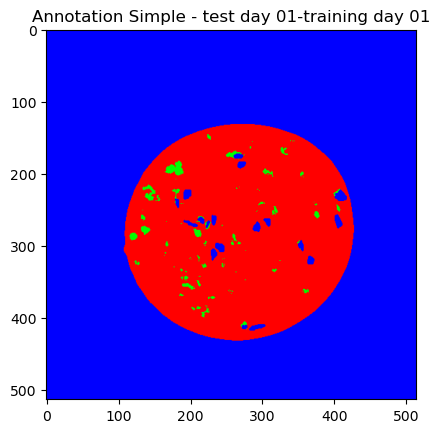

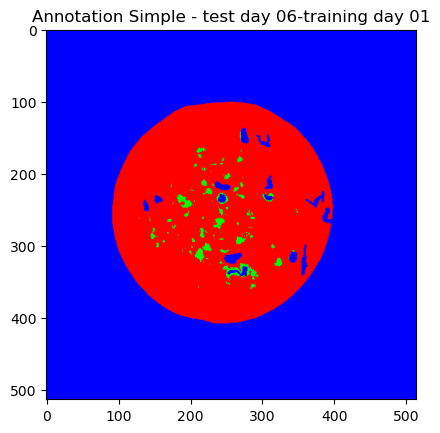

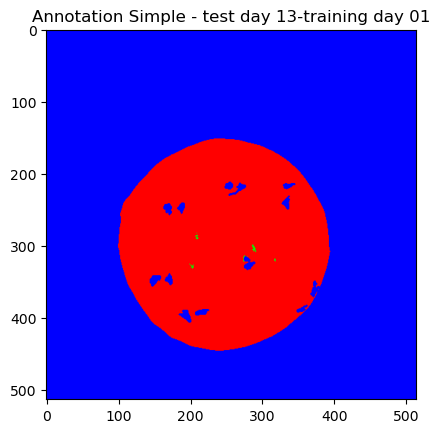

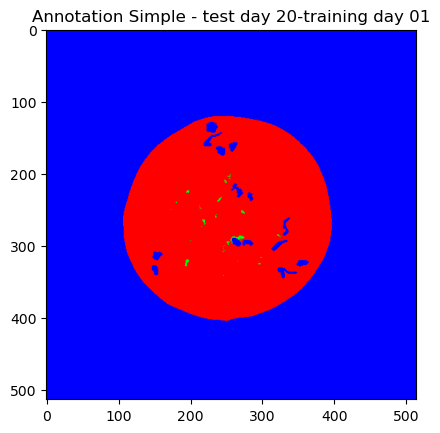

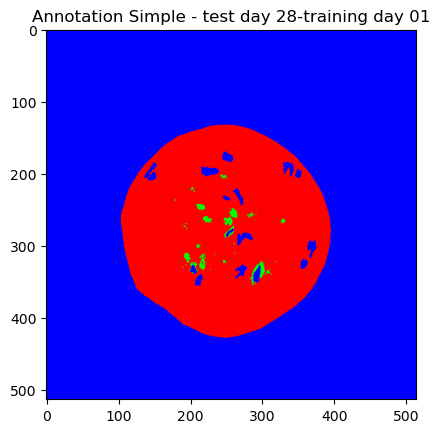

In [8]:
# simple
days = ['01','06','13','20','28']
training = '01'
for day in days:
    func.plotSimple(day,training,dirIn)


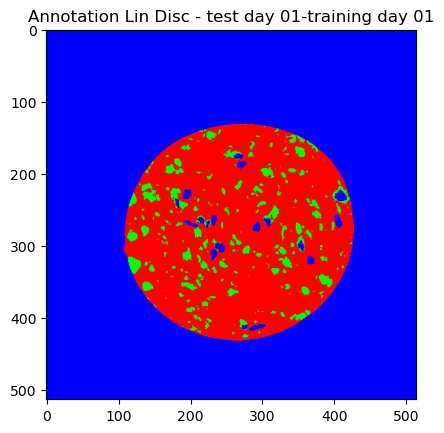

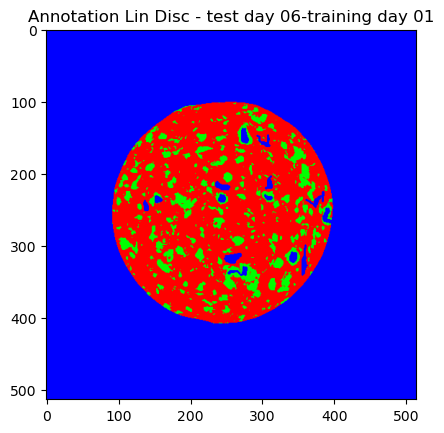

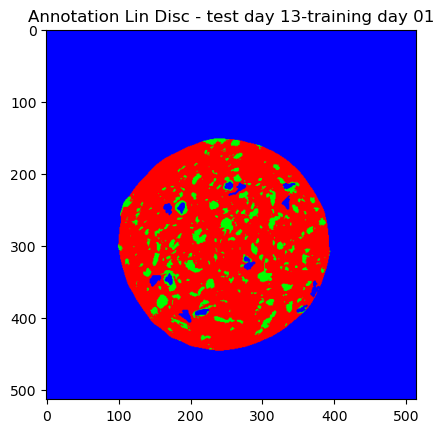

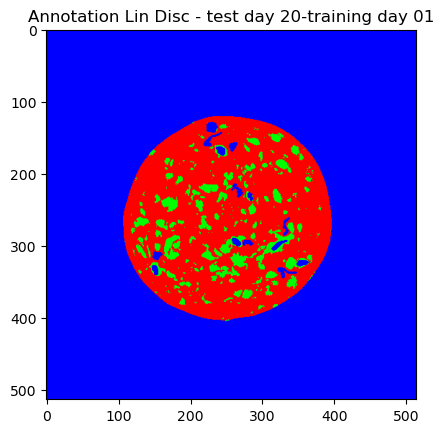

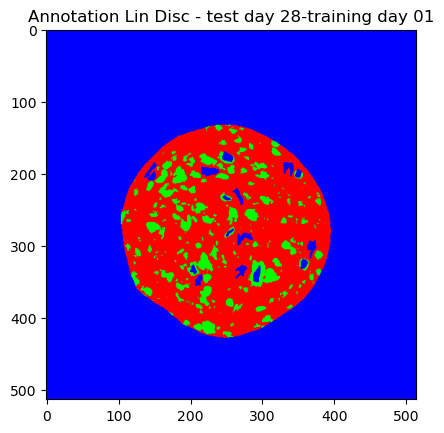

In [9]:
# linear discriminant plots without prior knowledge
days = ['01','06','13','20','28']
training = '01'
p = None

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

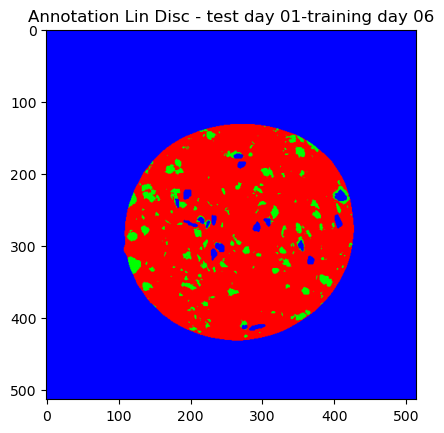

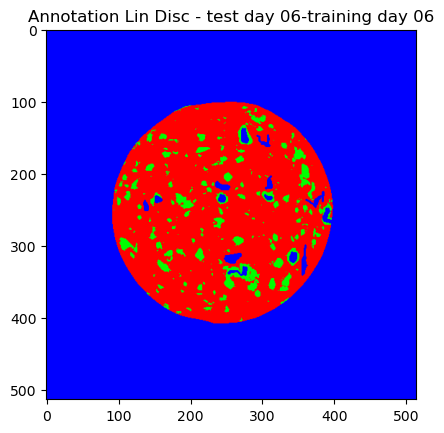

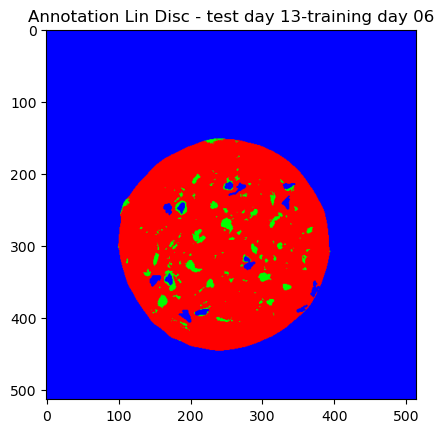

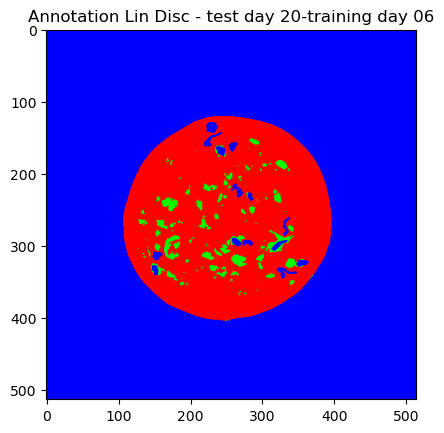

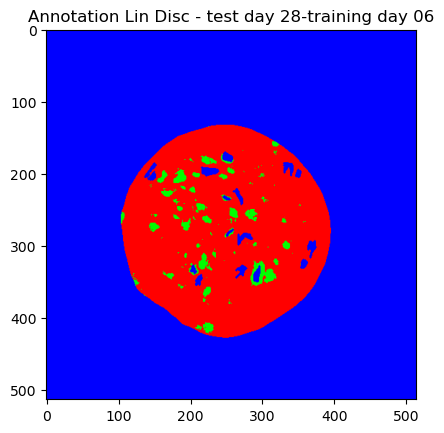

In [10]:
days = ['01','06','13','20','28']
training = '06'
p = None

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

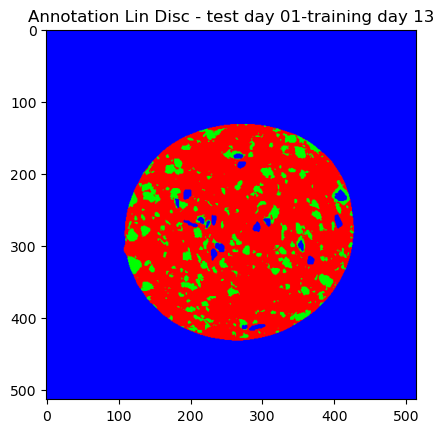

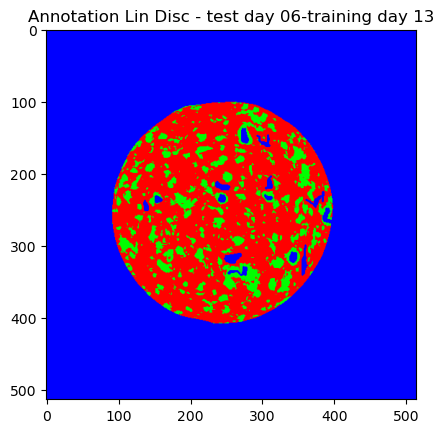

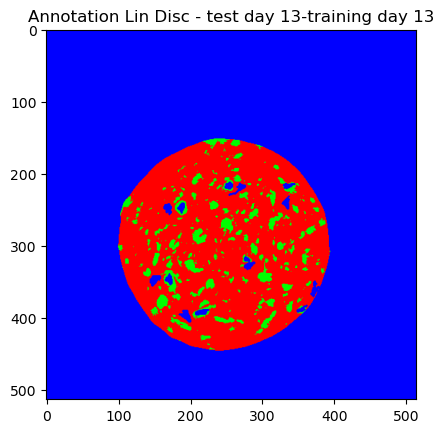

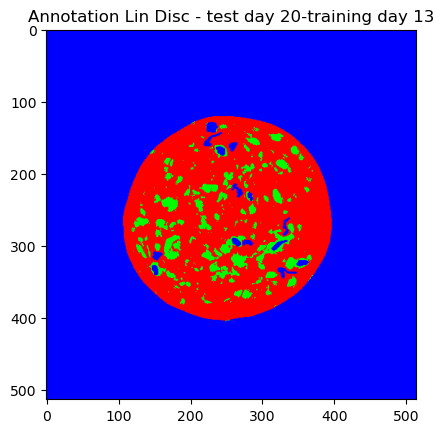

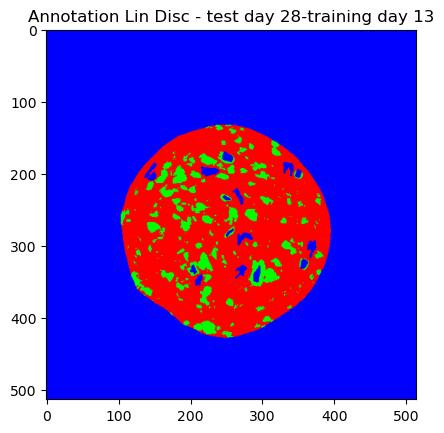

In [11]:
days = ['01','06','13','20','28']
training = '13'
p = None

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

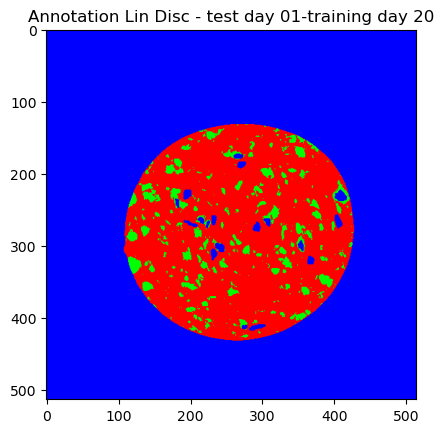

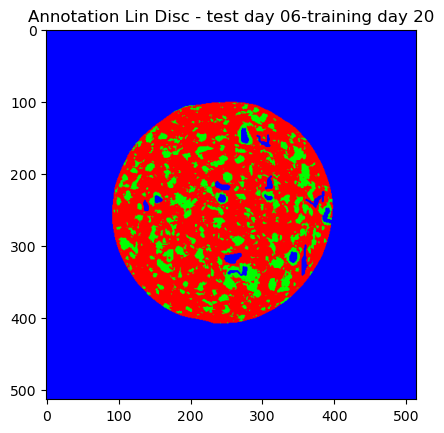

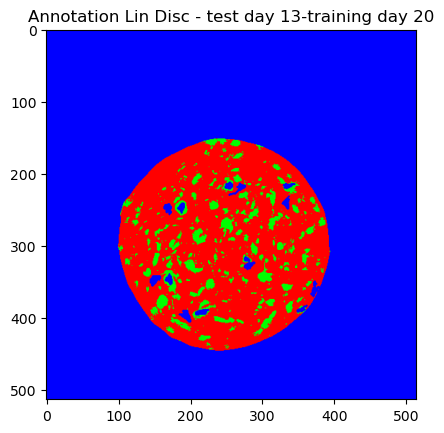

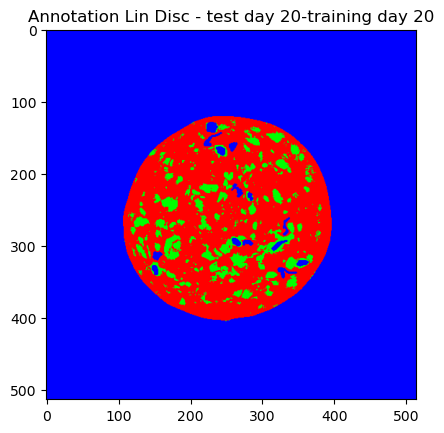

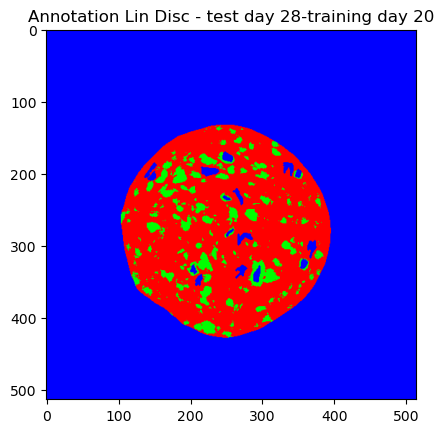

In [12]:
days = ['01','06','13','20','28']
training = '20'
p = None

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

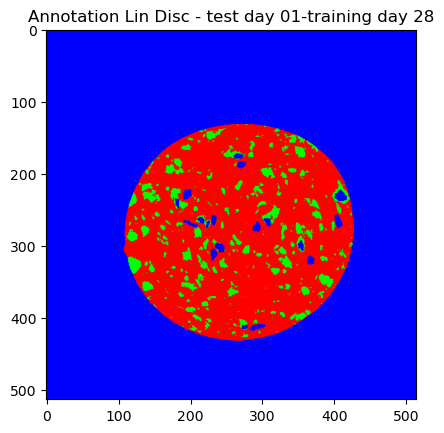

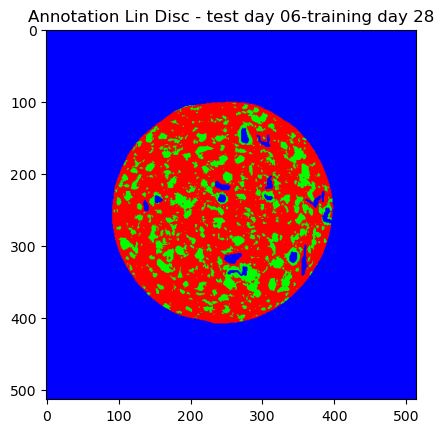

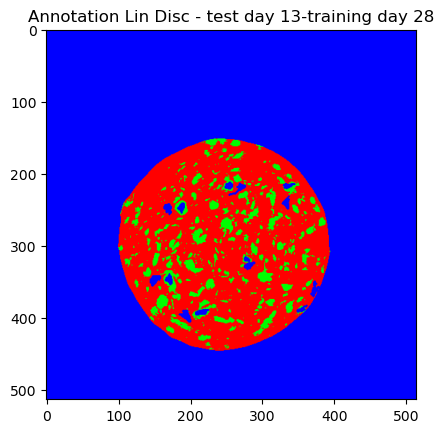

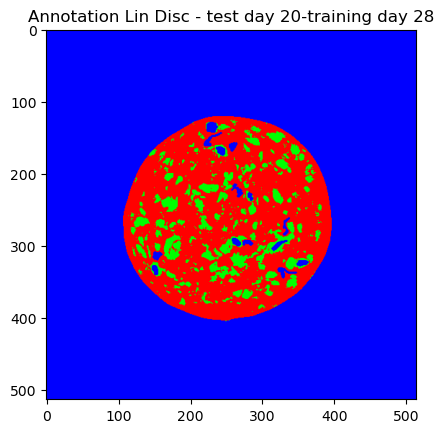

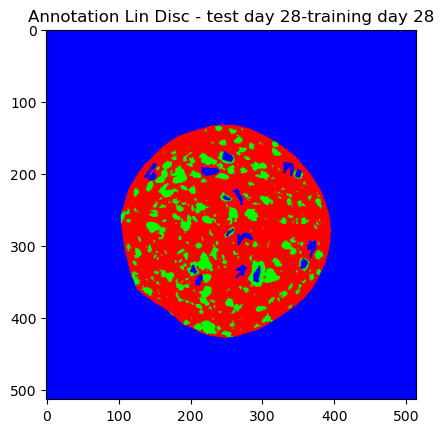

In [13]:
days = ['01','06','13','20','28']
training = '28'
p = None

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

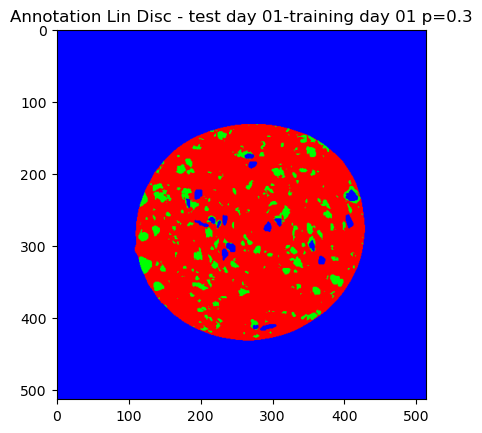

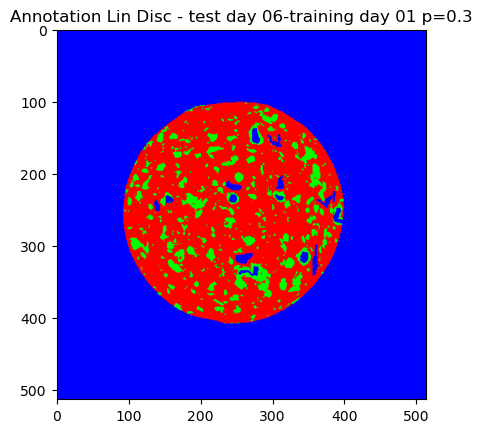

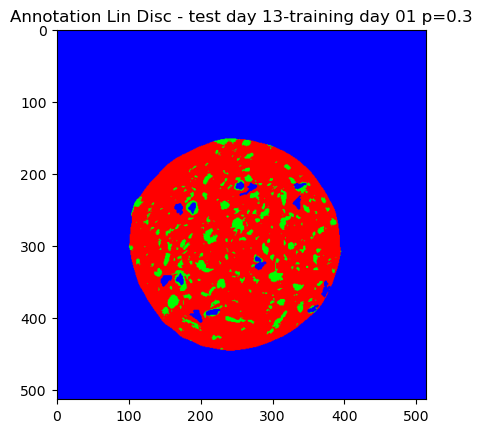

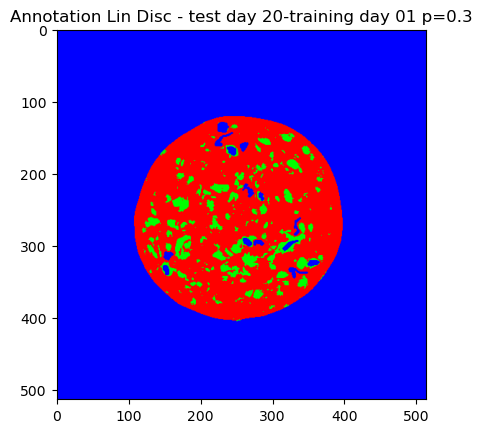

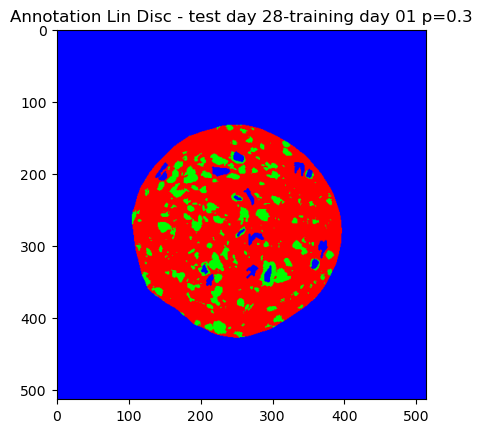

In [49]:
# including prior knowledge
days = ['01','06','13','20','28']
training = '01'
p = 0.3

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

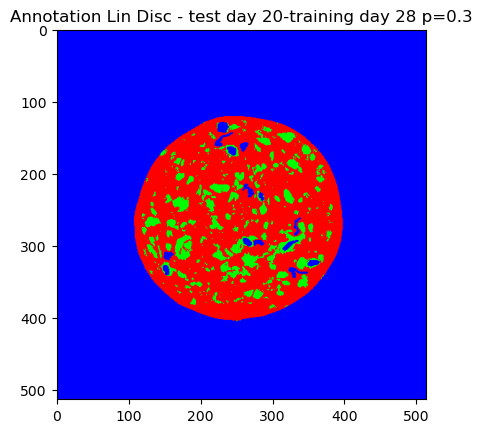

In [50]:
# including prior knowledge
days = ['20']
training = '28'
p = 0.3

for day in days:
    func.plotLinDisc(day,training,dirIn,p)

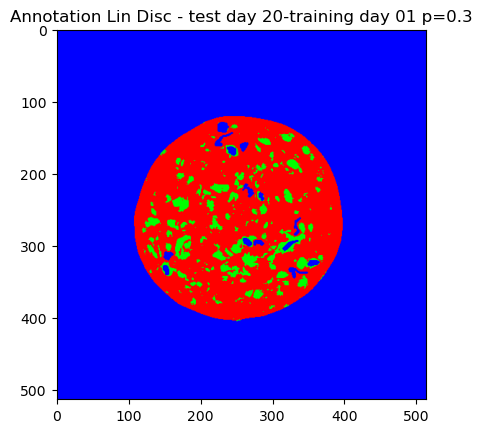

In [51]:
# including prior knowledge
days = ['20']
training = '01'
p = 0.3

for day in days:
    func.plotLinDisc(day,training,dirIn,p)